# Creating Asset and Speck Files x,y,z Data

*This example is based on https://github.com/IPSScienceVisualization/OpenSpace.*

First, I read in my data and create an astropy Table.

In [92]:
from astropy.io import ascii
from astropy.table import Table, Column

import numpy as np

In [93]:
#this is an input file we used for Uniview
data = ascii.read("AMG_run1k_out_100Myr_nointerp_t0.raw", names=['x','y','z','x2','y2','z2','logR','logL','t'])
data

x,y,z,x2,y2,z2,logR,logL,t
float64,float64,float64,float64,float64,float64,float64,float64,float64
-1.820982,-0.800956,-0.344258,-1.831593,-0.802398,-0.349934,-0.758,-2.635,0.0
-1.82322,-0.804641,-0.344406,-1.834297,-0.799041,-0.349772,-0.767,-2.662,0.0
1.923283,0.51022,-1.703798,1.916028,0.508344,-1.698146,-0.6,-2.125,0.0
1.919212,0.509374,-1.705578,1.917044,0.50768,-1.702502,-0.859,-3.128,0.0
0.174317,0.770536,-1.734353,0.164833,0.763571,-1.717282,-0.351,-1.454,0.0
0.173797,0.767959,-1.735647,0.166596,0.765208,-1.718954,-0.766,-4.199,0.0
0.821024,0.384103,-1.764961,0.846666,0.413095,-1.767998,-0.846,-2.905,0.0
0.824811,0.386587,-1.766051,0.848928,0.415671,-1.771152,-0.699,-5.185,0.0
0.200721,-0.474372,0.549109,0.224507,-0.469473,0.517206,0.331,2.143,0.0


### Trimming Our Astropy Table

We only keep the columns we want in our speck file.

In [94]:
data.keep_columns(['x', 'y', 'z', 'logR', 'logL'])
data

x,y,z,logR,logL
float64,float64,float64,float64,float64
-1.820982,-0.800956,-0.344258,-0.758,-2.635
-1.82322,-0.804641,-0.344406,-0.767,-2.662
1.923283,0.51022,-1.703798,-0.6,-2.125
1.919212,0.509374,-1.705578,-0.859,-3.128
0.174317,0.770536,-1.734353,-0.351,-1.454
0.173797,0.767959,-1.735647,-0.766,-4.199
0.821024,0.384103,-1.764961,-0.846,-2.905
0.824811,0.386587,-1.766051,-0.699,-5.185
0.200721,-0.474372,0.549109,0.331,2.143


In [95]:
from matplotlib import pyplot as plt

In [96]:
#data.add_column(Column((data['logR'].data - min(data['logR']))/(max(data['logR']) - min(data['logR'])), name='logRscaled'  ))
data.add_column(Column(np.linspace(0,1,len(data['logR'].data)), name='logRscaled'  ))
data.add_column(Column((data['logL'].data - min(data['logL']))/(max(data['logL']) - min(data['logL'])), name='logLscaled'  ))
print(min(data['logR']), max(data['logR']))
print(min(data['logL']), max(data['logL']))

-0.874 1.145
-9.0 5.872


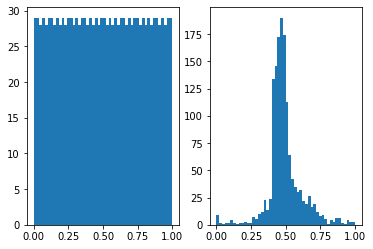

In [97]:
f, ax = plt.subplots(1,2)
_ = ax[0].hist(data['logRscaled'], bins=50)
_ = ax[1].hist(data['logLscaled'], bins=50)

Create the speck file

In [122]:
from datetime import date
import os
from shutil import copy2

In [127]:
def makeSpeck(file_name, data, datasource='unknown'):
    today = str(date.today())

    f= open(file_name + ".speck","w+")
    f.write(
    "# File created using data from " + datasource + "\n" +
    "# Adler Planetarium \n" +
    "# Prepared on: " + today + "\n")

    #write the header information
    for i,d in enumerate(data.colnames):
        if (i >= 3): #the first 3 columns are assumed as x,y,z; we only define the columns after that!
            f.write(f"datavar {i-3} {d}\n")
        
    #write the data
    for row in data:
        for d in data.columns:
            f.write(f"{row[d]:.4f} ")
        f.write("\n")

    f.close()

In [128]:
def makeAsset(file_name, GUI_name2 ='unknown', GUI_path2 = '/Adler', unit = 'Mpc', tex = 'point3.png', \
              scale = 340.0, bsize = [10.0, 50.0], color = [1.0, 1.0, 1.0], \
              cmap = 'colorbv.cmap', cmapOps = ['logLscaled', 'logRscaled'], cmapLims = [[0.0, 1.0], [0.0, 1.0]]):
#currently color is not used, but could be included if cmap is None
#also currently forcing 2 cmap options; will need to make that more general
    
    f2 = open(file_name + ".asset","w+")
    f2.write(
    "local assetHelper = asset.require('util/asset_helper') \n \n \n \n" +
    "local textures = asset.syncedResource({\n" +
    "    Name = \"" + GUI_name2 + " Textures\",\n" +
    "    Type = \"HttpSynchronization\",\n" + 
    "    Identifier = \"adlerplanetarium_" + file_name + "_textures\",\n" + 
    "    Version = 1\n" + 
    "})\n \n" + 
    "local speck = asset.syncedResource({\n" +
    "    Name = \"" + GUI_name2 + " Speck Files\",\n" + 
    "    Type = \"HttpSynchronization\",\n" + 
    "    Identifier = \"adlerplanetarium_" + file_name + "_speck\",\n" + 
    "    Version = 1\n" + 
    "})\n \n" +
    "local object = {\n" +
    "    Identifier = \"" + GUI_name2 + "\",\n" +
    "    Renderable = {\n" + 
    "        Type = \"RenderableBillboardsCloud\",\n" +
    "        Enabled = true,\n" + 
    "        Color = { " + str(color[0]) + ", " + str(color[1]) + ", " + str(color[2]) + " },\n" + 
    "        Opacity = 1.0,\n" + 
    "        ScaleFactor = " + str(scale) + ",\n" + 
    "        File = speck .. \"/" + file_name + ".speck\",\n" + 
    "        ColorMap = speck .. \"/" + cmap + "\",\n" +
    "        ColorOption = { \"" + cmapOps[0] + "\", \"" + cmapOps[1] + "\" },\n" +
    "        ColorRange = { { " + str(cmapLims[0][0]) + ", " + str(cmapLims[0][1]) + " }, { " + str(cmapLims[1][0]) + ", " + str(cmapLims[1][1]) +  " } },\n" +
    "        Texture = textures .. \"/" + tex + "\",\n" + 
    "        Unit = \"" + unit + "\",\n" + 
    "        -- Fade in value in the same unit as \"Unit\"\n" + 
#     "        FadeInDistances = { " + str(fade[0]) + ", " + str(fade[1]) + " },\n" + 
    "        DisableFadeInDistance = true,\n" +
    "        CorrectionSizeEndDistance = 12,\n" +
    "        BillboardMaxSize = " + str(bsize[1]) + ",\n" + 
    "        BillboardMinSize = " + str(bsize[0]) + ",\n" + 
    "        TextSize = 14.8,\n" + 
    "        TextMinSize = 10.0,\n" + 
    "        TextMaxSize = 50.0\n" + 
    "    },\n" + 
    "    GUI = {\n"
    "        Name = \"" + GUI_name2 + "\",\n" +
    "        Path = \"" + GUI_path2 + "\"\n" +
    "    }\n" +
    "}\n \n \n \n" + 
    "assetHelper.registerSceneGraphNodesAndExport(asset, { object })"  
    )

    f2.close()

In [129]:
def moveFiles(file_name, tex = 'point3.png', cmap = 'colorbv.cmap', scene = 'Adler'):
    speck_file = file_name + ".speck"
    asset_file = file_name + ".asset"

# input("Write the path to OpenSpace here. e.g C:/Users/akinnane/Desktop/OpenSpace-0.12.0/ ")
    start_path_OS = 'C:/Users/Public/Documents/OpenSpace-0.15.2' 
    start_path_files = os.getcwd().replace("\\","/")
    initial_speck_path = os.path.join(start_path_OS, "sync/http/")

    if os.path.isfile(os.path.join(start_path_files, speck_file)):
        final_path_speck = os.path.join(initial_speck_path, "adlerplanetarium_" + speck_file[:-6] + "_speck/1").replace("\\","/")
        print("speck : ",final_path_speck)
        if not os.path.isdir(final_path_speck):
            os.makedirs(final_path_speck)
        copy2(os.path.join(start_path_files, speck_file), final_path_speck)
        copy2(os.path.join(start_path_files, cmap), final_path_speck)
        copy2(os.path.join(start_path_files, "1.ossync"), final_path_speck[:-1])

        final_path_textures = os.path.join(initial_speck_path, "adlerplanetarium_" + file_name + "_textures/1").replace("\\","/")
        if not os.path.isdir(final_path_textures):
            os.makedirs(final_path_textures)
        copy2(os.path.join(start_path_files, tex), final_path_textures)
        copy2(os.path.join(start_path_files, "1.ossync"), final_path_textures[:-1])
        
    else:
        print ("Speck file not found in your directory")

    asset_path = os.path.join(start_path_OS, "data/assets/scene//").replace("\\","/") + scene + "/"
    print("asset : ",asset_path)
    
    if os.path.isfile(os.path.join(start_path_files, asset_file)):
        if not os.path.isdir(asset_path):
            os.makedirs(asset_path)
        copy2(os.path.join(start_path_files, asset_file), asset_path)
    else:
        print ("Asset file not found in your directory")


In [130]:
fname = 'Pleiades_Nbody'
cmap = 'viridis.cmap'
tex = 'point3A.png'
makeSpeck(fname, data, "Aaron Geller's nbody6 star cluster simulation")
makeAsset(fname, 'Nbody', unit = 'pc', cmap = cmap, tex = tex)
moveFiles(fname, cmap = cmap, tex = tex)

speck :  C:/Users/Public/Documents/OpenSpace-0.15.2/sync/http/adlerplanetarium_Pleiades_Nbody_speck/1
asset :  C:/Users/Public/Documents/OpenSpace-0.15.2/data/assets/scene//Adler/
